<a href="https://www.kaggle.com/code/lazyrook/eda-binaryclassification-92?scriptVersionId=130885049" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hr-competency-scores-for-screening/dataset.csv


## 1. Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 2. Loading the dataset

In [3]:
df_raw = pd.read_csv("/kaggle/input/hr-competency-scores-for-screening/dataset.csv")

In [4]:
df_raw.head()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1


In [5]:
df_raw.shape

(300, 10)

In [6]:
df_raw.columns

Index(['years_of_experience', 'functional_competency_score',
       'top1_skills_score', 'top2_skills_score', 'top3_skills_score',
       'behavior_competency_score', 'top1_behavior_skill_score',
       'top2_behavior_skill_score', 'top3_behavior_skill_score',
       'call_for_interview'],
      dtype='object')

In [7]:
print(df_raw.isnull().sum())


years_of_experience            0
functional_competency_score    0
top1_skills_score              0
top2_skills_score              0
top3_skills_score              0
behavior_competency_score      0
top1_behavior_skill_score      0
top2_behavior_skill_score      0
top3_behavior_skill_score      0
call_for_interview             0
dtype: int64


We see that there are no missing values

In [8]:
df_raw.dtypes

years_of_experience            float64
functional_competency_score    float64
top1_skills_score              float64
top2_skills_score              float64
top3_skills_score              float64
behavior_competency_score      float64
top1_behavior_skill_score      float64
top2_behavior_skill_score      float64
top3_behavior_skill_score      float64
call_for_interview               int64
dtype: object

### Therefore, we can conclude that this dataset requires no further preprocessing

In [9]:
df = df_raw

## 3. EDA

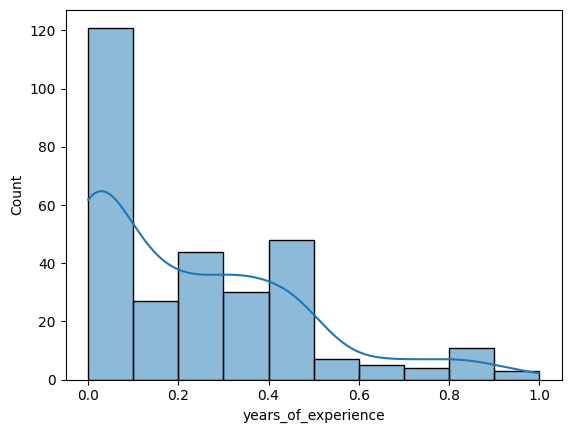

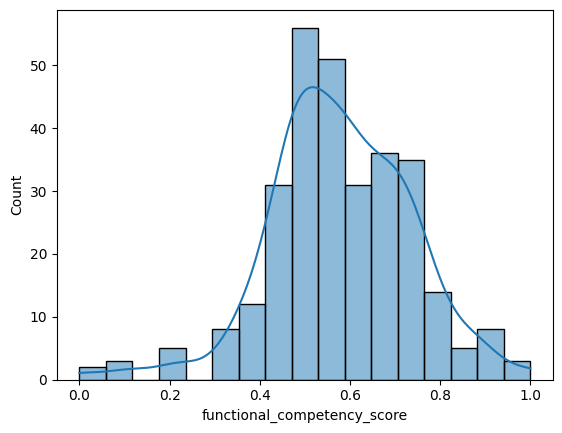

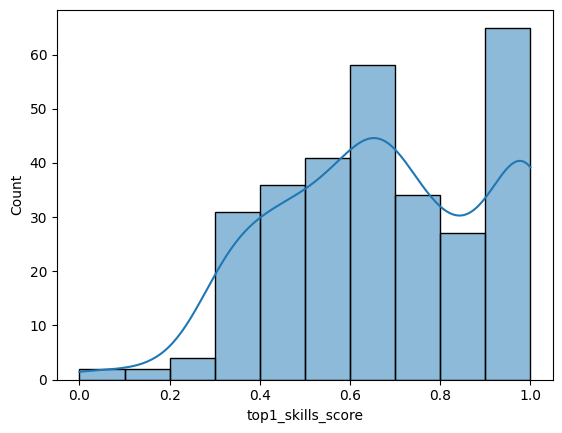

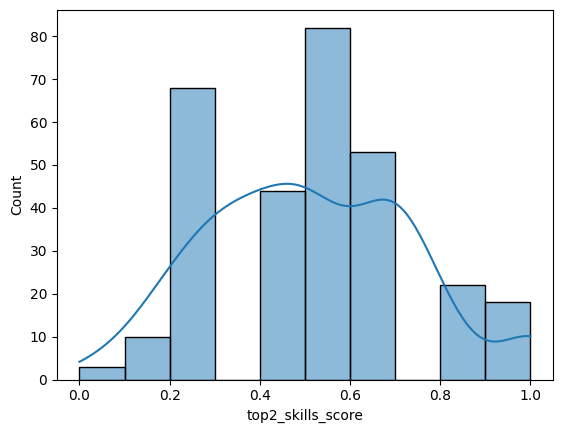

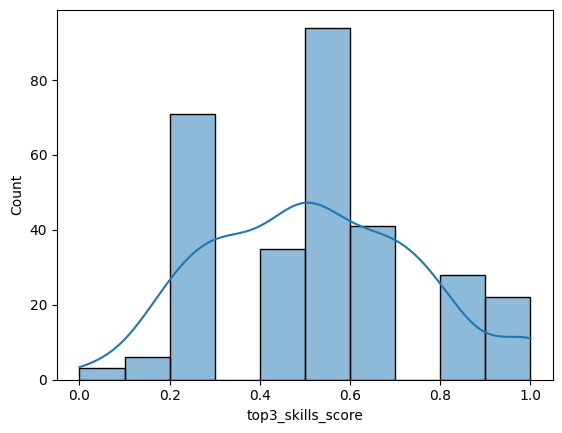

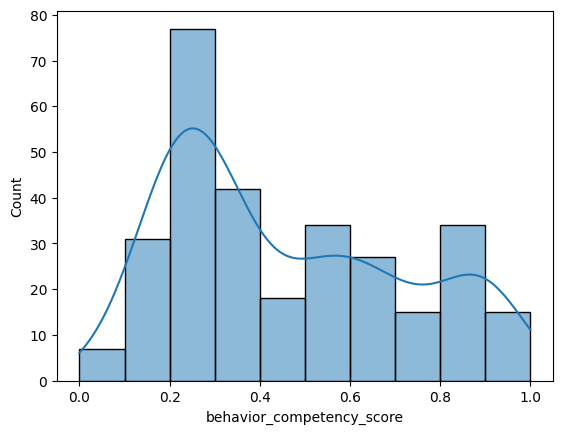

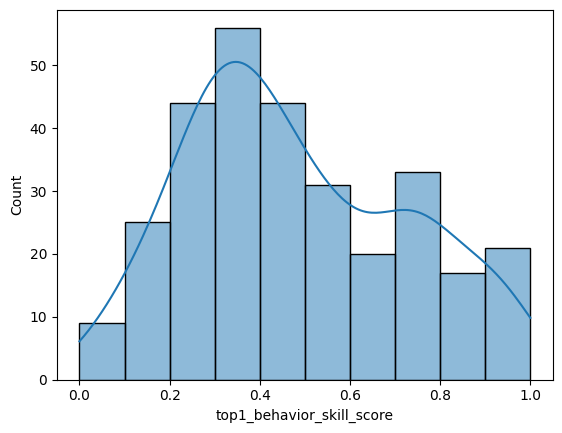

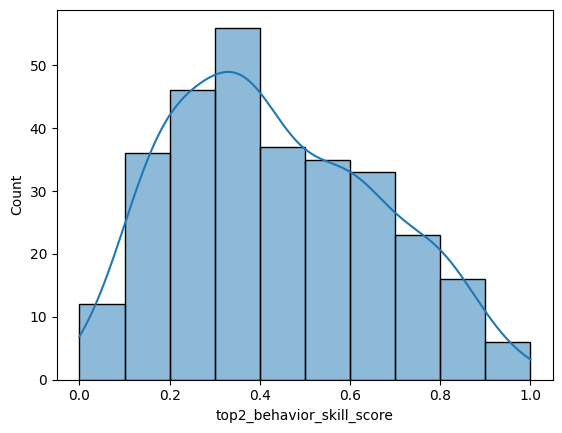

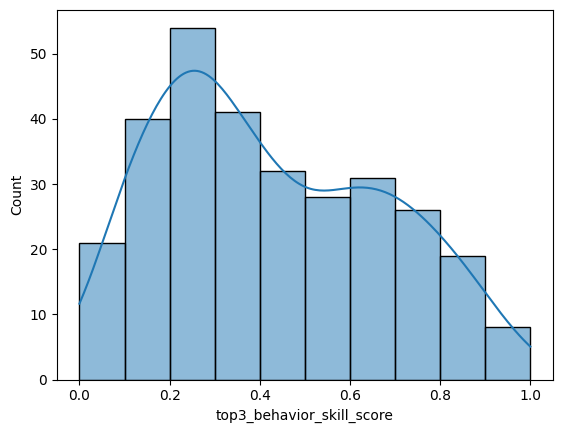

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='years_of_experience', kde=True)
plt.show()

sns.histplot(data=df, x='functional_competency_score', kde=True)
plt.show()

sns.histplot(data=df, x='top1_skills_score', kde=True)
plt.show()

sns.histplot(data=df, x='top2_skills_score', kde=True)
plt.show()

sns.histplot(data=df, x='top3_skills_score', kde=True)
plt.show()

sns.histplot(data=df, x='behavior_competency_score', kde=True)
plt.show()

sns.histplot(data=df, x='top1_behavior_skill_score', kde=True)
plt.show()

sns.histplot(data=df, x='top2_behavior_skill_score', kde=True)
plt.show()

sns.histplot(data=df, x='top3_behavior_skill_score', kde=True)
plt.show()



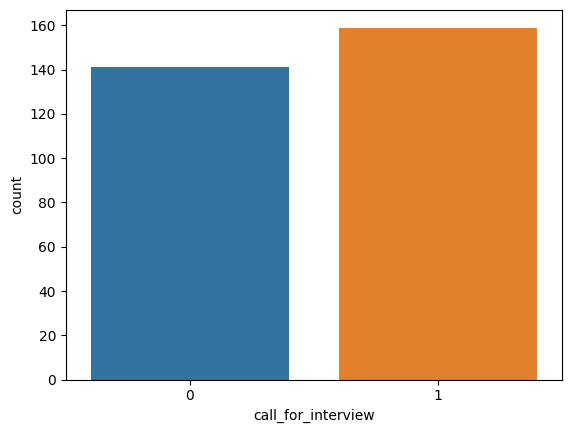

In [11]:
sns.countplot(x='call_for_interview', data=df)
plt.show()

## 4. ML : Binary Classification Model (call_for_interview)

In [12]:
value_counts = df['call_for_interview'].value_counts()
print(value_counts)


1    159
0    141
Name: call_for_interview, dtype: int64


Value counts are same for both True and False cases. 

In [13]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/1

In [14]:
from pycaret.utils import version
version()

'3.0.2'

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)


In [16]:
train.shape


(240, 10)

In [17]:
train.columns

Index(['years_of_experience', 'functional_competency_score',
       'top1_skills_score', 'top2_skills_score', 'top3_skills_score',
       'behavior_competency_score', 'top1_behavior_skill_score',
       'top2_behavior_skill_score', 'top3_behavior_skill_score',
       'call_for_interview'],
      dtype='object')

In [18]:
test.shape

(60, 10)

In [19]:
test.columns

Index(['years_of_experience', 'functional_competency_score',
       'top1_skills_score', 'top2_skills_score', 'top3_skills_score',
       'behavior_competency_score', 'top1_behavior_skill_score',
       'top2_behavior_skill_score', 'top3_behavior_skill_score',
       'call_for_interview'],
      dtype='object')

In [20]:
from pycaret.classification import *

In [21]:
exp_clf102 = setup(data = train, target = 'call_for_interview', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  ) 

,Description,Value
0,Session id,123
1,Target,call_for_interview
2,Target type,Binary
3,Original data shape,"(240, 10)"
4,Transformed data shape,"(240, 10)"
5,Transformed train set shape,"(168, 10)"
6,Transformed test set shape,"(72, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [22]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9408,0.9703,0.9344,0.9607,0.9441,0.8812,0.8882,0.3780
xgboost,Extreme Gradient Boosting,0.9349,0.9747,0.9344,0.9516,0.9393,0.8687,0.8764,0.0990
catboost,CatBoost Classifier,0.9349,0.9735,0.9133,0.9689,0.9355,0.8704,0.8795,2.0060
lr,Logistic Regression,0.9287,0.9750,0.8800,0.9900,0.9269,0.8586,0.8714,0.5560
et,Extra Trees Classifier,0.9287,0.9673,0.8911,0.9800,0.9275,0.8586,0.8715,0.3320
ridge,Ridge Classifier,0.9169,0.0000,0.8600,0.9900,0.9151,0.8357,0.8513,0.0710
qda,Quadratic Discriminant Analysis,0.9169,0.9495,0.8589,0.9889,0.9150,0.8353,0.8492,0.0760
lda,Linear Discriminant Analysis,0.9169,0.9667,0.8600,0.9900,0.9151,0.8357,0.8513,0.0790
rf,Random Forest Classifier,0.9165,0.9643,0.9022,0.9466,0.9191,0.8330,0.8430,0.3500
nb,Naive Bayes,0.9162,0.9706,0.8589,0.9900,0.9141,0.8344,0.8503,0.0740


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [23]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9412,0.9583,0.8889,1.0000,0.9412,0.8828,0.8889
1,0.8824,0.9722,0.8889,0.8889,0.8889,0.7639,0.7639
2,0.9412,0.9861,1.0000,0.9000,0.9474,0.8811,0.8874
3,0.8824,0.9583,1.0000,0.8182,0.9000,0.7606,0.7833
4,0.8824,0.9028,0.7778,1.0000,0.8750,0.7671,0.7888
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9412,0.9571,0.9000,1.0000,0.9474,0.8811,0.8874
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Model Visualization

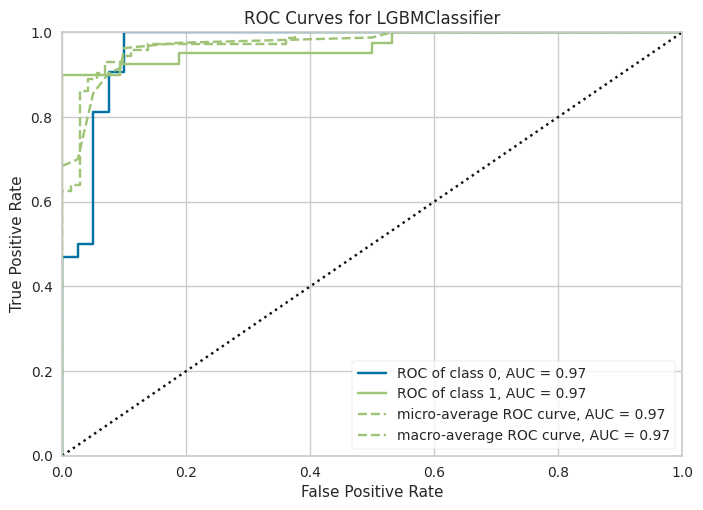

In [24]:
plot_model(model, plot = 'auc')

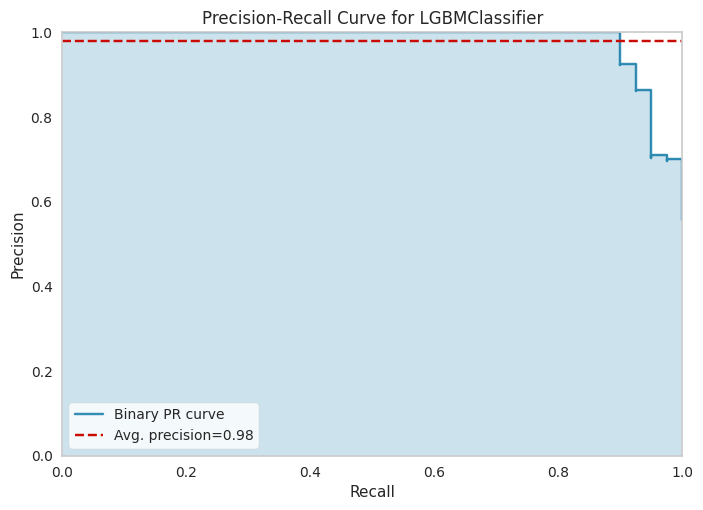

In [25]:
plot_model(model, plot = 'pr')

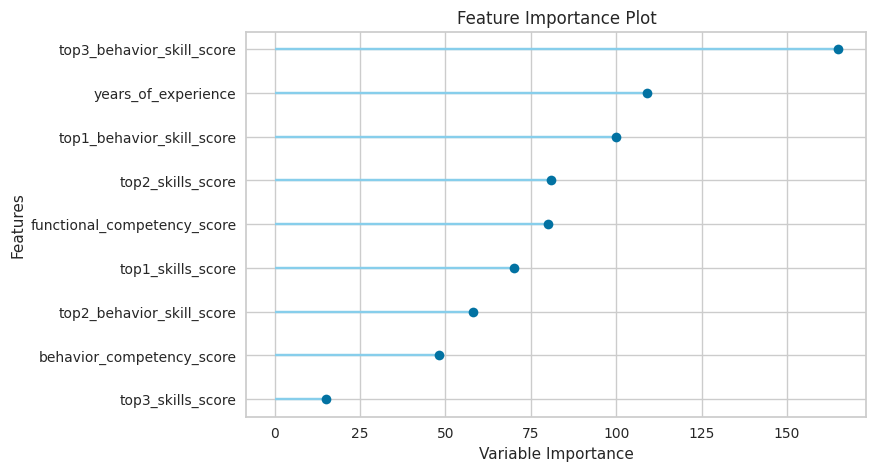

In [26]:
plot_model(model, plot='feature')

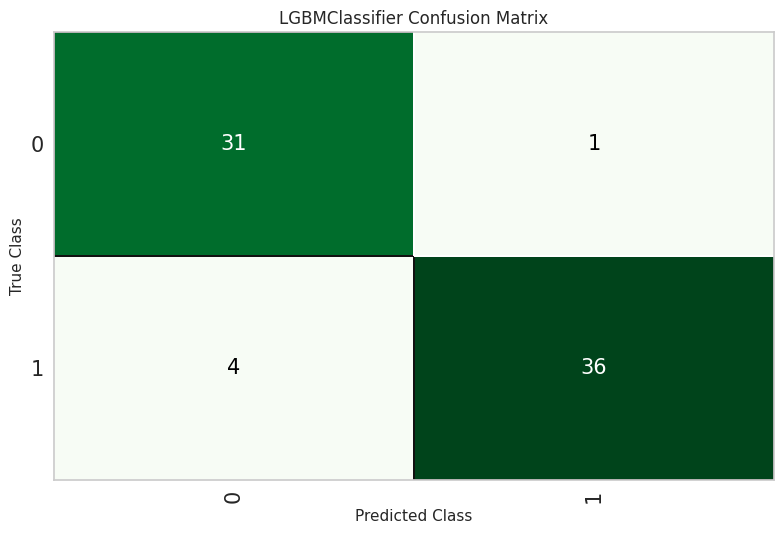

In [27]:
plot_model(model, plot = 'confusion_matrix')

### Finalize the model

In [28]:
final_lgbm = finalize_model(model)

In [29]:
final_lgbm

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['years_of_experience',
                                             'functional_competency_score',
                                             'top1_skills_score',
                                             'top2_skills_score',
                                             'top3_skills_score',
                                             'behavior_competency_score',
                                             'top1_behavior_skill_score',
                                             'top2_behavior_skill_score',
                                             'top3_behavior_skill_score'],
                                    transfo...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=123,
                                reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                                subsample=1.0, subsample_for_bin=200000,
                                subsample_freq=0))],
         verbose=False)

In [30]:
predict_model(final_lgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [31]:
unseen_predictions = predict_model(final_lgbm, data=test)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9167,0.9596,0.8889,0.9231,0.9057,0.8311,0.8316


,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview,prediction_label,prediction_score
203,0.066667,0.617898,0.555556,0.5,0.1,0.358974,0.501159,0.479171,0.544675,1,1,0.8752
266,0.333333,0.582040,0.777778,0.5,0.5,0.538462,0.432551,0.529618,0.490171,1,1,0.9999
152,0.000000,0.380478,0.555556,0.3,0.2,0.384615,0.359815,0.198042,0.225824,0,0,0.9998
9,0.066667,0.492876,0.888889,0.3,0.4,0.205128,0.390003,0.345407,0.333950,0,0,0.8843
233,0.000000,0.470876,0.444444,0.4,0.3,0.282051,0.121486,0.331361,0.255644,0,0,0.9995


#### Best performing model is LGBM with an accuracy of ~91.67